## STOCK

In [3]:
#http://www.andrewshamlet.net/2017/07/13/python-tutorial-stochastic-oscillator/

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Stochastic Oscilator %K
def STOK(close, low, high, n): 
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 return STOK

# Stochastic Oscilator %D
def STOD(close, low, high, n):
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 STOD = pd.Series.rolling(STOK, 3).mean()
 return STOD


In [3]:
#STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100

In [4]:
# Quick example how rise work
from sklearn.preprocessing import LabelEncoder
dftst = pd.DataFrame({'B': [10,9,8,7,6,5,4,3,2,1,0, 1, 2, 3, 4,5,6,7.0,8.0,9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8]})
dftst['rollMax']=pd.Series.rolling(dftst['B'],3).max()
dftst['rollMin']=pd.Series.rolling(dftst['B'],3).min()
dftst['fall']=pd.Series.rolling(dftst['B'],3).max()-dftst['B']>=2
##dfrev= dftst[::-1]
##dftst['revB']= dfrev['B'] 
##dftst['revmax']= pd.Series.rolling(dfrev['B'],3).max()
#encoder = LabelEncoder
dftst['rise']= (dftst['B']-pd.Series.rolling(dftst['B'],3).min()>=2)*1

dftst

,B,rollMax,rollMin,fall,rise
0,10.0,NaN,NaN,False,0
1,9.0,NaN,NaN,False,0
2,8.0,10.0,8.0,True,0
3,7.0,9.0,7.0,True,0
4,6.0,8.0,6.0,True,0
5,5.0,7.0,5.0,True,0
6,4.0,6.0,4.0,True,0
7,3.0,5.0,3.0,True,0
8,2.0,4.0,2.0,True,0
9,1.0,3.0,1.0,True,0


In [24]:
import datetime 
from pandas import read_csv
from pandas import concat
import os.path


start = datetime.datetime(2014, 1, 1)
end = datetime.datetime.now()
file_path='./data/aapl.csv'
#lastDate=df.index[df.shape[0]-1]
if not os.path.exists(file_path):
    print("Empty set")
    df =web.DataReader("AAPL",'yahoo',start,end)  
    df.index.name = 'Date'
else:
    print("Read from file")  
    df = read_csv(file_path)
    df.index.name = 'Date'
'''  print("Updating")  
    startDate=df.index[df.shape[0]-1] #last recorded day
    #date_1 = datetime.datetime.strptime(start, "%y/%m/%d")
    start = start + datetime.timedelta(days=1)
    df1 =web.DataReader("AAPL",'yahoo',start,end)     
    entireSet=[df,df1]
    df=pd.concat(entireSet)'''
    
##if( df[])
##
df.shape

Empty set


(967, 6)

In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,79.382858,79.575714,78.860001,79.018570,73.522530,58671200
2014-01-03,78.980003,79.099998,77.204285,77.282860,71.907555,98116900
2014-01-06,76.778572,78.114288,76.228569,77.704285,72.299644,103152700
2014-01-07,77.760002,77.994286,76.845711,77.148575,71.782608,79302300
2014-01-08,76.972855,77.937141,76.955711,77.637146,72.237190,64632400


In [26]:
df.to_csv('./data/aapl.csv')

In [27]:
from sklearn.preprocessing import LabelEncoder
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df['Avg5'] =pd.Series.rolling(df['Close'],5).mean()
df['Avg10'] =pd.Series.rolling(df['Close'],10).mean()
df['Rise'] = (df['Close'] - pd.Series.rolling(df['Close'],5).min() > 3 )*1
#df.tail()
df.shape

(967, 11)

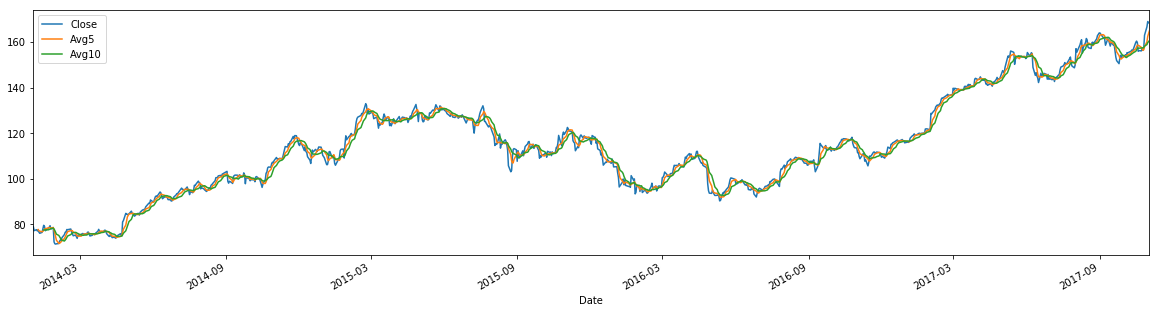

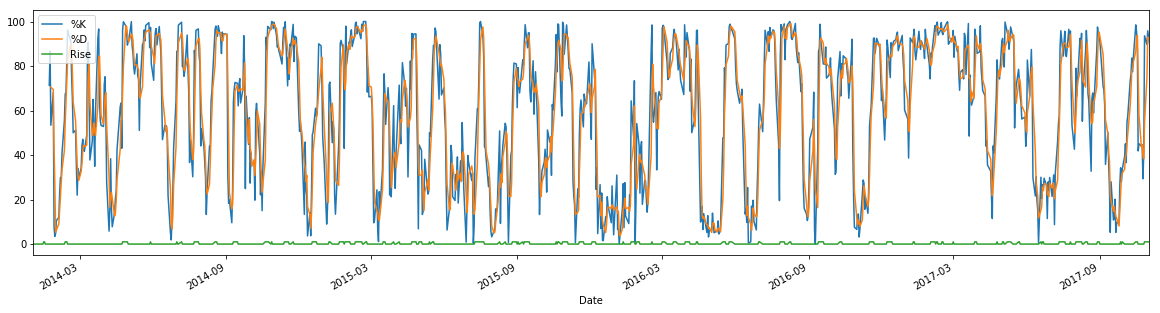

In [28]:
df.plot(y=['Close','Avg5','Avg10'], figsize = (20, 5))
df.plot(y=['%K', '%D','Rise'], figsize = (20, 5))

In [29]:
# convert series to supervised learning
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

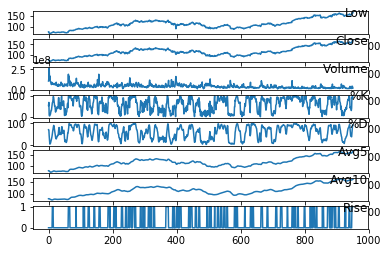

In [30]:
from matplotlib import pyplot

df.dropna(inplace=True)

values = df.values
# specify columns to plot
groups = [ 2, 3, 5, 6, 7,8,9,10]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [31]:
values[1]

array([  7.85814290e+01,   7.92571410e+01,   7.79642870e+01,
         7.86428600e+01,   7.31729430e+01,   1.38719700e+08,
         6.80079641e+01,   6.93821606e+01,   7.86665710e+01,
         7.83961433e+01,   0.00000000e+00])

In [36]:
from sklearn.preprocessing import MinMaxScaler

# ensure all data is float
#values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
####reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18,19,20]], axis=1, inplace=True)
reframed= pd.DataFrame(scaled)
print(reframed.head())

         0         1         2         3         4         5         6   \
0  0.086485  0.078846  0.075848  0.067725  0.059965  0.376073  0.533971   
1  0.080706  0.077651  0.077330  0.074206  0.065703  0.499181  0.680080   
2  0.019967  0.019635  0.012622  0.009832  0.008705  1.000000  0.076208   
3  0.012895  0.008513  0.007511  0.001419  0.001257  0.448115  0.034589   
4  0.010822  0.007245  0.004667  0.000000  0.000000  0.620425  0.048503   

         7         8         9    10  
0  0.700000  0.071838  0.060490  0.0  
1  0.688377  0.074851  0.063297  0.0  
2  0.412280  0.061801  0.058625  0.0  
3  0.238017  0.046241  0.051330  0.0  
4  0.017624  0.028951  0.042126  0.0  


In [38]:
# split into train and test sets
from keras.utils.np_utils import to_categorical

values = reframed.values
n_train_hours = 600
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], to_categorical(train[:, -1])
test_X, test_y = test[:, :-1], to_categorical(test[:, -1])
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((1,train_X.shape[0], train_X.shape[1]))
test_X = test_X.reshape((1,test_X.shape[0], test_X.shape[1]))


print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1, 600, 10) (600, 2) (1, 352, 10) (352, 2)


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
# design network
model = Sequential()
''' this is good
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(8, input_dim=3, activation='relu'))
model.add(Dense(2, activation='softmax'))'''

#Dense expects a 2-dimensional input (batch_size, features), 
#whereas the output of LSTM with return_sequences is 3 dimensional (batch_size, timesteps, features).

#stacked
model.add(LSTM(20,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(LSTM(20))
model.add(Dense(8, input_dim=10, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())

'''model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(TimeDistributed(Dense(2, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())'''

#model.compile(loss='mae', optimizer='adam')
# it should be categorical
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 600, 20)           2480      
_________________________________________________________________
dense_11 (Dense)             (None, 600, 8)            168       
_________________________________________________________________
dense_12 (Dense)             (None, 600, 2)            18        
Total params: 2,666
Trainable params: 2,666
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# fit network
#history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history = model.fit(train_X, train_y, epochs=20, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
'''pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()'''

ValueError: Error when checking target: expected dense_12 to have 3 dimensions, but got array with shape (600, 2)

In [151]:
# make a prediction
#test_X.shape
yhat = model.predict(test_X)
#yhat = model.predict(train_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [47]:
yhat

array([[ 0.72617662,  0.27382332],
       [ 0.72014022,  0.27985978],
       [ 0.71684068,  0.28315929],
       [ 0.71626693,  0.2837331 ],
       [ 0.72124207,  0.2787579 ],
       [ 0.71372575,  0.28627422],
       [ 0.71205407,  0.28794593],
       [ 0.71188003,  0.28811997],
       [ 0.71305829,  0.28694171],
       [ 0.71895742,  0.28104258],
       [ 0.70987445,  0.29012546],
       [ 0.70862764,  0.29137236],
       [ 0.70992804,  0.29007202],
       [ 0.71298939,  0.28701064],
       [ 0.71390945,  0.28609055],
       [ 0.71539068,  0.28460929],
       [ 0.71606851,  0.28393149],
       [ 0.71589309,  0.28410691],
       [ 0.71938097,  0.28061903],
       [ 0.72132009,  0.27867985],
       [ 0.72263241,  0.27736759],
       [ 0.72324753,  0.2767525 ],
       [ 0.72748101,  0.27251905],
       [ 0.7270456 ,  0.27295434],
       [ 0.72987068,  0.27012932],
       [ 0.72805858,  0.27194136],
       [ 0.72981936,  0.27018061],
       [ 0.73130977,  0.26869023],
       [ 0.72833496,

In [149]:

#np.argwhere(yhat > 0.6)
np.where(yhat>0.5)[0]


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  22,  24,  29,  30,  31,  32,  33,  34,
        36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

In [146]:
yhat[21]

array([[ 0.49974352,  0.47702044]], dtype=float32)

In [138]:

import numpy as np
mycase= np.array([[ 5.8,  4. ,  1.2,  0.2,0.4,0.5,0.3,0.2 ,0.3,0.4]])
mycase=mycase.reshape(1,1,10)
model.predict(mycase)

array([[ 0.79172683,  0.20827314]], dtype=float32)

In [59]:
values[10,:]

array([ 0.03852263,  0.03150303,  0.03530217,  0.02953714,  0.03021936,
        0.32847463,  0.4099467 ,  0.31312716,  0.01433132,  0.00343808,  0.        ])

In [68]:
df.values[10,:]

array([  7.44828570e+01,   7.47042850e+01,   7.39114300e+01,
         7.42399980e+01,   6.94897990e+01,   9.25701000e+07,
         4.09946700e+01,   3.35373005e+01,   7.30028566e+01,
         7.30461419e+01,   0.00000000e+00])

In [ ]:
def custom_index(array, compare_function):

  for i, v in enumerate(array):

    if compare_function(v):

      return i